In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
url = '/content/house_prices.csv'
df = pd.read_csv(url)

In [ ]:
df_float = df.select_dtypes(include=['float64']).copy()
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [ ]:
df_float.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [ ]:
df_float['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=False)

In [ ]:
df_float['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=False)

In [ ]:
df_float['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=False)

In [ ]:
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrArea   1460 non-null   float64
 2   GarageYrBlt  1460 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [ ]:
lotFrontage = df_float[['LotFrontage']]
salePrice = df['SalePrice']

In [ ]:
lr1 = LinearRegression()
lr1.fit(lotFrontage, salePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr1.coef_)
print(lr1.intercept_)
print(mean_squared_error(salePrice, lr1.predict(lotFrontage)))

[1208.0155492]
96299.75696070473
5599428130.969559


In [ ]:
masVnrAre = df_float[['MasVnrArea']]
salePrice = df['SalePrice']

In [ ]:
lr2 = LinearRegression()
lr2.fit(masVnrAre, salePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr2.coef_)
print(lr2.intercept_)
print(mean_squared_error(salePrice, lr2.predict(masVnrAre)))

[209.08536998]
159242.12458511663
4882373206.33175


In [ ]:
garageYrBlt = df_float[['GarageYrBlt']]
salePrice = df['SalePrice']

In [ ]:
lr3 = LinearRegression()
lr3.fit(garageYrBlt, salePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr3.coef_)
print(lr3.intercept_)
print(mean_squared_error(salePrice, lr3.predict(garageYrBlt)))

[1556.68774577]
-2898995.104363801
4912566774.814545


<Figure size 432x288 with 0 Axes>

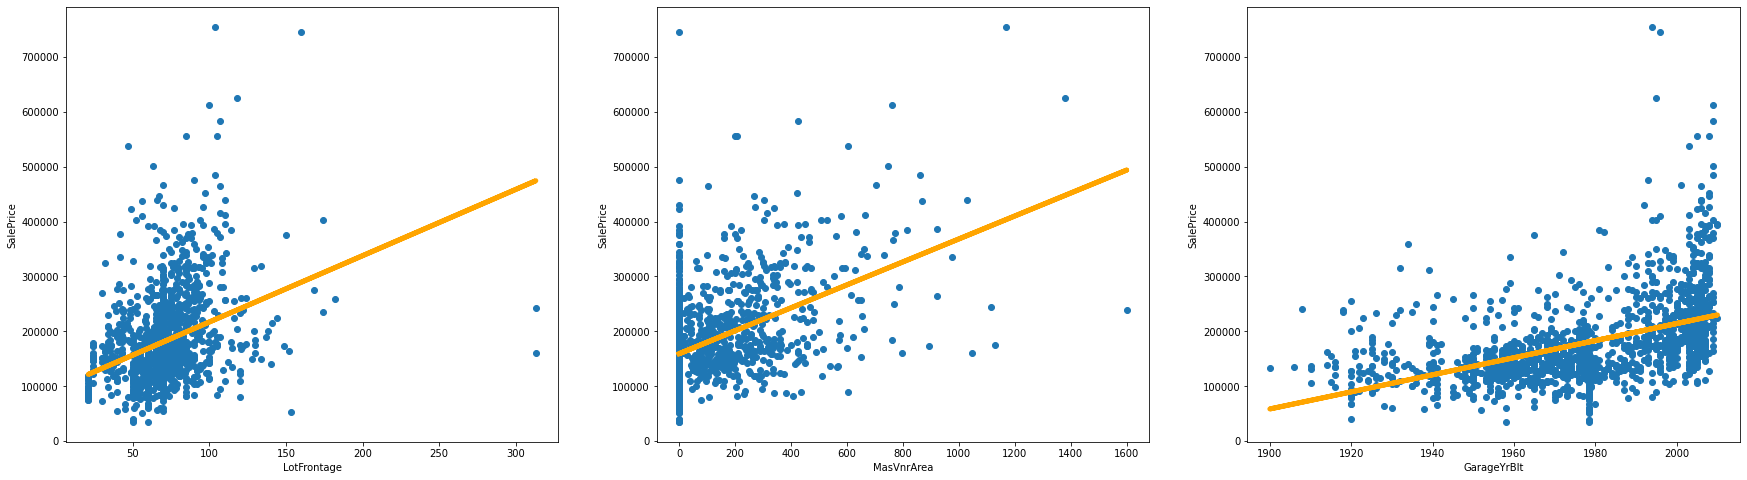

In [ ]:
f = plt.figure()
f, ax = plt.subplots(1, 3, figsize=(30, 8))

ax = plt.subplot(1, 3, 1)
plt.ylabel('SalePrice')
plt.xlabel('LotFrontage')
ax = plt.scatter(lotFrontage, salePrice)
ax = plt.plot(lotFrontage, lr1.predict(lotFrontage), linewidth=5.0, color='orange')

ax = plt.subplot(1, 3, 2)
plt.ylabel('SalePrice')
plt.xlabel('MasVnrArea')
ax = plt.scatter(masVnrAre, salePrice)
ax = plt.plot(masVnrAre, lr2.predict(masVnrAre), linewidth=5.0, color='orange')

ax = plt.subplot(1, 3, 3)
plt.ylabel('SalePrice')
plt.xlabel('GarageYrBlt')
ax = plt.scatter(garageYrBlt, salePrice)
ax = plt.plot(garageYrBlt, lr3.predict(garageYrBlt), linewidth=5.0, color='orange')


ax = plt.show()

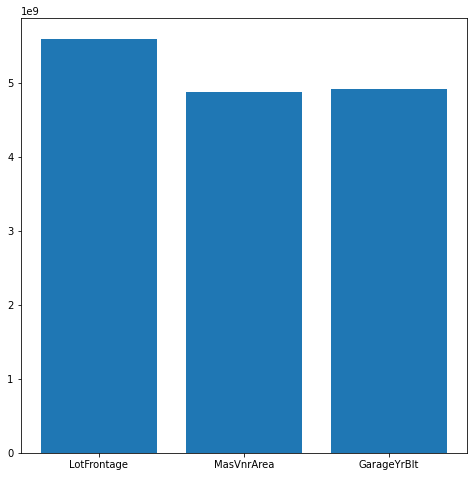

In [ ]:
names = ['LotFrontage', 'MasVnrArea',	'GarageYrBlt']
heights = [
           mean_squared_error(salePrice, lr1.predict(lotFrontage)),
           mean_squared_error(salePrice, lr2.predict(masVnrAre)),
           mean_squared_error(salePrice, lr3.predict(garageYrBlt))]

f = plt.figure(figsize=(8,8))
ax = plt.bar(names, heights)